In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [3]:
dados = pd.read_csv('Brasil/MicrodadosBrasilTratado2019.csv',sep=';',encoding='latin1',low_memory=False)

In [4]:
dados.columns

Index(['NU_INSCRICAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q007', 'Q008',
       'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'CO_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_REDACAO',
       'RendaMaxima', 'ClasseSocial', 'anosEstudoPai', 'anosEstudoMae',
       'COR_RACA', 'RazaoPessoasQuarto', 'PessoasPorQuarto', 'NU_MEDIA'],
      dtype='object')

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature selection
def select_features(treino_x, treino_y, teste_x, num_features='all'):
    print(num_features)
    fs = SelectKBest(score_func=chi2, k=num_features)
    fs.fit(treino_x, treino_y)
    X_train_fs = fs.transform(treino_x)
    X_test_fs = fs.transform(teste_x)
    return X_train_fs, X_test_fs, fs

def label_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_transformed = oe.transform(X)
    return X_transformed

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [6]:
classificacao = dados.NU_MEDIA > dados.NU_MEDIA.quantile(0.75)
#classificacao = dados.NU_MEDIA > 600

dados['classificacao'] = classificacao

# dados['classificacao'].replace(False, "Baixo Desempenho", inplace=True)
# dados['classificacao'].replace(True, "Alto Desempenho", inplace=True)
dados['classificacao'].replace(False, 0, inplace=True)
dados['classificacao'].replace(True, 1, inplace=True)

In [7]:
dados.NU_IDADE.value_counts()

17    419706
18    337122
19     71810
20     19250
16     17754
       ...  
5          1
70         1
68         1
66         1
2          1
Name: NU_IDADE, Length: 64, dtype: int64

In [11]:
features_para_selecao_categoricas = [
        'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q007', 'Q008',
       'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q018','Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'TP_SEXO', 'TP_COR_RACA',
        'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'CO_UF_ESC', 'TP_LINGUA',
       'ClasseSocial','COR_RACA', 'PessoasPorQuarto']

features_para_selecao_numericas = ['RendaMaxima','NU_IDADE','anosEstudoPai','anosEstudoMae','RazaoPessoasQuarto']

In [12]:
y = dados["classificacao"]
x = dados[features_para_selecao_categoricas]  
x = x.astype(str)

In [13]:
x

,Q001,Q002,Q003,Q004,Q005,Q007,Q008,Q009,Q010,Q011,...,Q025,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,CO_UF_ESC,TP_LINGUA,ClasseSocial,COR_RACA,PessoasPorQuarto
0,NaoSabe,Medio,"Grupo(A,B,C)","Grupo(D,E)",3,D,E,4,C,A,...,Sim,F,Branco,Particular,Urbano,15.0,0,E,Branco,"(0, 1]"
1,FundamentalIncompleto,FundamentalIncompleto,"Grupo(A,B,C)","Grupo(A,B,C)",4,A,B,1,A,A,...,Nao,F,Parda,Estadual,Urbano,15.0,0,E,NaoBranco,"(3, 4]"
2,Medio,Medio,"Grupo(A,B,C)","Grupo(A,B,C)",9,A,B,3,A,A,...,Nao,F,Parda,Estadual,Urbano,15.0,0,E,NaoBranco,"(2, 3]"
3,Medio,Medio,"Grupo(A,B,C)","Grupo(A,B,C)",3,A,B,2,A,A,...,Sim,F,Parda,Estadual,Urbano,15.0,1,E,NaoBranco,"(1, 2]"
4,FundamentalCompleto,FundamentalIncompleto,"Grupo(A,B,C)","Grupo(A,B,C)",3,A,B,2,A,B,...,Nao,M,Parda,Estadual,Urbano,15.0,0,E,NaoBranco,"(1, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879695,FundamentalCompleto,Medio,"Grupo(D,E)","Grupo(D,E)",5,A,B,2,A,A,...,Sim,F,Branco,Estadual,Urbano,31.0,0,E,Branco,"(2, 3]"
879696,Superior,Superior,"Grupo(D,E)","Grupo(D,E)",3,B,C,2,A,A,...,Sim,F,Branco,Estadual,Urbano,31.0,0,C,Branco,"(1, 2]"
879697,Superior,Superior,"Grupo(D,E)","Grupo(D,E)",5,D,C,3,C,A,...,Sim,F,Preta,Federal,Urbano,31.0,0,C,NaoBranco,"(1, 2]"
879698,Medio,Superior,"Grupo(A,B,C)","Grupo(D,E)",4,A,B,3,B,B,...,Sim,F,Parda,Federal,Urbano,31.0,1,C,NaoBranco,"(1, 2]"


In [14]:
features_categoricas_labeled = pd.DataFrame(label_inputs(x))


In [36]:
database_numericas = dados[features_para_selecao_numericas] 


In [37]:
database_numericas

,RendaMaxima,NU_IDADE,anosEstudoPai,anosEstudoMae,RazaoPessoasQuarto
0,1497,18,0,12,0.75
1,998,26,4,4,4.00
2,1497,17,12,12,3.00
3,1497,18,12,12,1.50
4,0,17,9,4,1.50
...,...,...,...,...,...
879695,998,17,9,12,2.50
879696,7984,18,16,16,1.50
879697,4990,18,16,18,1.67
879698,7984,18,12,18,1.33


In [38]:
features_categoricas_labeled['RendaMaxima'] = database_numericas['RendaMaxima']
features_categoricas_labeled['NU_IDADE'] = database_numericas['NU_IDADE']
features_categoricas_labeled['anosEstudoPai'] = database_numericas['anosEstudoPai']
features_categoricas_labeled['anosEstudoMae'] = database_numericas['anosEstudoMae']
features_categoricas_labeled['RazaoPessoasQuarto'] = database_numericas['RazaoPessoasQuarto']


In [39]:
 x = features_categoricas_labeled
# one_hot_data = pd.get_dummies(x)
# x = one_hot_data

In [15]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 659775 elementos e testaremos com 219925 elementos


# Feature Selection

In [18]:
# # prepare input data
treino_x_enc, teste_x_enc = prepare_inputs(treino_x, teste_x)
# prepare output data
treino_y_enc, teste_y_enc = prepare_targets(treino_y, teste_y)

In [78]:
X_train_fs, X_test_fs, fs = select_features(treino_x_enc, treino_y_enc, teste_x_enc,6)


6


In [79]:
X_train_fs

array([[0., 2., 0., 2., 1., 0.],
       [1., 1., 0., 1., 0., 0.],
       [3., 4., 0., 2., 1., 0.],
       ...,
       [1., 0., 0., 1., 0., 1.],
       [2., 0., 1., 2., 1., 3.],
       [4., 2., 0., 1., 0., 1.]])

In [76]:
fs.scores_

array([3.82898911e+04, 5.03390424e+04, 1.50056367e+04, 2.13359125e+04,
       4.19533523e+02, 6.53978085e+04, 3.23675461e+04, 1.06732898e+04,
       4.90233441e+04, 8.40018155e+02, 7.27552985e+02, 2.51455092e+04,
       1.08644340e+04, 6.52011789e+03, 1.54864365e+04, 1.36078518e+04,
       3.15045702e+04, 2.36621444e+04, 4.24622480e+03, 2.36442302e+04,
       3.50191851e+01, 2.17273722e+04, 2.74985493e+04, 5.60407855e+03,
       2.14389736e+03, 2.35960119e+04, 3.13063204e+05, 4.21537745e+01,
       2.01776662e+04, 2.03597248e+04, 2.98843792e+04, 1.05583146e+04,
       1.36642887e+04])

In [80]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
# grafico = plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

Feature 0: 38289.891136
Feature 1: 50339.042390
Feature 2: 15005.636713
Feature 3: 21335.912531
Feature 4: 419.533523
Feature 5: 65397.808547
Feature 6: 32367.546050
Feature 7: 10673.289816
Feature 8: 49023.344145
Feature 9: 840.018155
Feature 10: 727.552985
Feature 11: 25145.509213
Feature 12: 10864.434004
Feature 13: 6520.117895
Feature 14: 15486.436543
Feature 15: 13607.851786
Feature 16: 31504.570168
Feature 17: 23662.144383
Feature 18: 4246.224795
Feature 19: 23644.230167
Feature 20: 35.019185
Feature 21: 21727.372179
Feature 22: 27498.549277
Feature 23: 5604.078555
Feature 24: 2143.897357
Feature 25: 23596.011869
Feature 26: 313063.203729
Feature 27: 42.153774
Feature 28: 20177.666233
Feature 29: 20359.724841
Feature 30: 29884.379178
Feature 31: 10558.314564
Feature 32: 13664.288731


In [21]:
result_selection = pd.DataFrame(fs.scores_,[i for i in range(len(fs.scores_))])
dict_qtd = {0:"Features"}
result_selection.rename(columns = dict_qtd , inplace = True)

In [89]:
dados.groupby('Q007')['NU_MEDIA'].describe()

,count,mean,std,min,25%,50%,75%,max
Q007,,,,,,,,
A,809711.0,523.949924,76.572960,301.26,466.96,516.30,574.780,845.00
B,36396.0,593.699182,92.819907,328.24,522.00,605.30,667.265,827.58
C,8140.0,593.389204,96.083335,334.00,516.40,604.98,671.830,813.50
D,25453.0,607.245489,96.287222,307.28,532.32,624.22,682.900,850.82


In [91]:
dados.groupby('TP_COR_RACA')['NU_MEDIA'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_COR_RACA,,,,,,,,
Amarelo,19584.0,528.929733,81.122484,301.26,468.800,517.54,580.480,814.24
Branco,346710.0,554.994500,82.813000,307.28,492.820,549.40,614.100,850.82
Indigena,4964.0,489.933497,65.666417,318.72,443.400,481.78,530.605,741.96
NaoDeclarado,17578.0,523.269167,86.346090,312.94,457.925,508.85,578.680,816.54
Parda,393948.0,513.579524,75.153010,306.48,457.900,504.68,561.540,840.56
Preta,96916.0,509.805555,70.307067,306.28,458.400,502.96,554.300,815.30


In [92]:
dados.groupby('Q002')['NU_MEDIA'].describe()

,count,mean,std,min,25%,50%,75%,max
Q002,,,,,,,,
FundamentalCompleto,127895.0,512.085095,69.632698,323.38,461.240,505.58,556.60,826.30
FundamentalIncompleto,222623.0,496.277327,66.636116,301.26,447.680,489.44,537.94,791.22
Medio,318445.0,533.201216,74.855687,312.00,477.940,527.34,583.80,827.58
NaoSabe,29416.0,488.878293,70.132298,306.28,437.915,479.03,529.74,840.56
Superior,181321.0,584.547426,84.993175,319.42,520.740,586.48,649.52,850.82


In [49]:
x.iloc[:,[i for i in range(len(result_selection))]].columns.tolist()

['Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'CO_UF_ESC',
 'TP_LINGUA',
 'ClasseSocial',
 'COR_RACA',
 'PessoasPorQuarto']

In [39]:
len(result_selection)

33

(0, 100000)

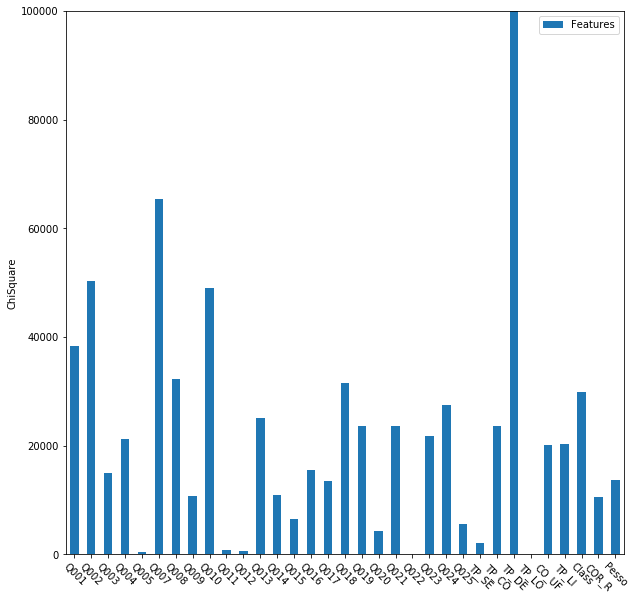

In [93]:
grafico = result_selection.plot.bar()
grafico.figure.set_figwidth(10)
grafico.figure.set_figheight(10)
# features_para_selecao_categoricas = [
#         'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q007', 'Q008',
#        'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
#        'Q018','Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
#        'SEXO', 'RACA',
#         'ADM_ESC',
#        'TP_LOCALIZACAO_ESC', 'UFESC', 'LINGUA',
#        'ClasseSocial','COR_RACA', 'PQ']
features_selecionadas_plotagem = x.iloc[:,[i for i in range(len(result_selection))]].columns.tolist()
xticklabels = grafico.axes.set_xticklabels(features_selecionadas_plotagem,rotation=-45)

# grafico.axes.set_xticklabels([str(tick)[:45] for tick in grafico.axes.get_xticklabels()])
grafico.axes.set_xticklabels(item.get_text()[:5] for item in grafico.axes.get_xticklabels())
ylabel = grafico.set_ylabel("ChiSquare")
grafico.axes.set_ylim(0,100000)

A acurácia foi 50.07%
0.5


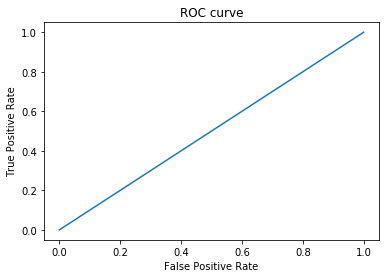

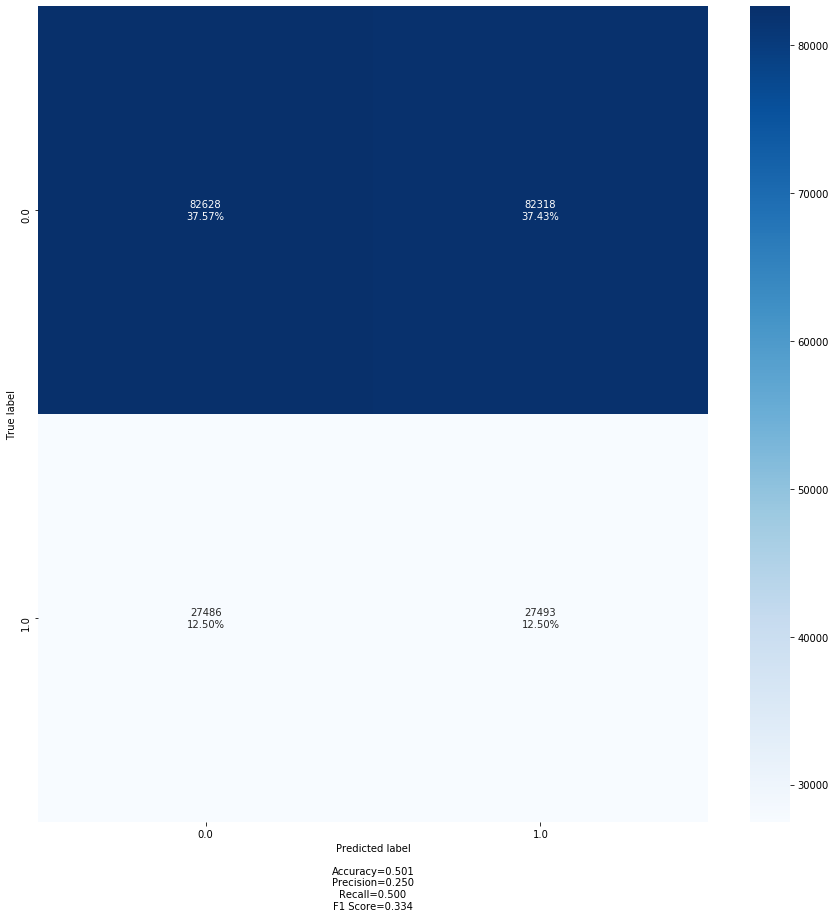

In [146]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform") 
dummy_clf.fit(treino_x, treino_y)
 
previsoes_burras = dummy_clf.predict(teste_x)
 
acuracia = accuracy_score(teste_y, previsoes_burras) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y,teste_x,dummy_clf)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y, previsoes_burras,labels), figsize=(15,15), categories=labels)

In [98]:
treino_y_enc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

A acurácia foi 81.80%
0.8079411914999439


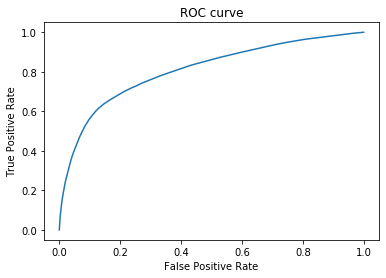

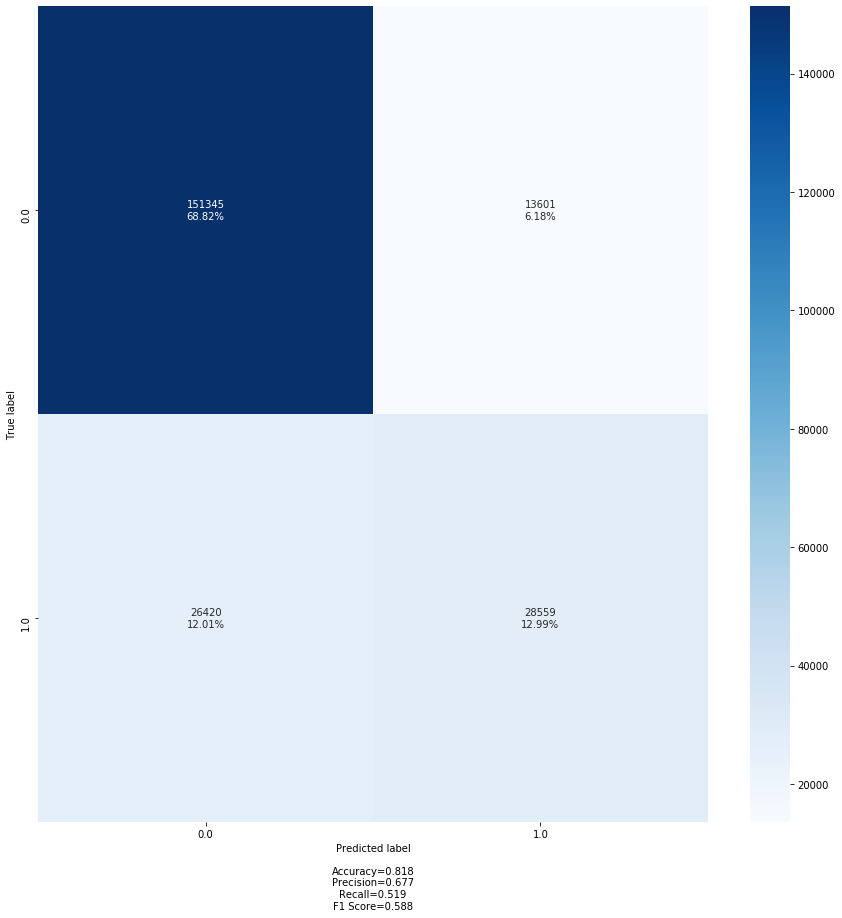

In [106]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo = modelo.fit(X_train_fs, treino_y_enc)
previsoes = modelo.predict(X_test_fs)
 
acuracia = accuracy_score(teste_y_enc, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
calcRoc(teste_y_enc,X_test_fs,modelo)
labels= y.unique()
make_confusion_matrix(confusion_matrix(teste_y_enc, previsoes,labels), figsize=(15,15), categories=labels)

In [154]:
features = x.columns.tolist()
r = export_text(modelo, feature_names=features)
print(r)



|--- 33 <= 33.50
|   |--- 33 <= 29.50
|   |   |--- 29 <= 0.50
|   |   |   |--- 33 <= 27.50
|   |   |   |   |--- 33 <= 24.50
|   |   |   |   |   |--- 33 <= 22.50
|   |   |   |   |   |   |--- 33 <= 20.50
|   |   |   |   |   |   |   |--- 2 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 2 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- 33 >  20.50
|   |   |   |   |   |   |   |--- 34 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 34 >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 33 >  22.50
|   |   |   |   |   |   |--- 23 <= 0.50
|   |   |   |   |   |   |   |--- 34 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 34 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- 23 >  0.50
|   |   |   |   |   |   |   |--- 21 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   

0.9506389741900072


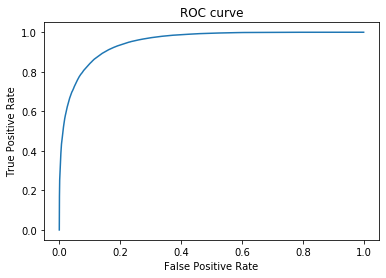

In [109]:
calcRoc(teste_y,teste_x,modelo)

In [93]:
labels = y.unique()
confusion_matrix(teste_y, previsoes,labels)

array([[155573,   9373],
       [ 13744,  41235]], dtype=int64)

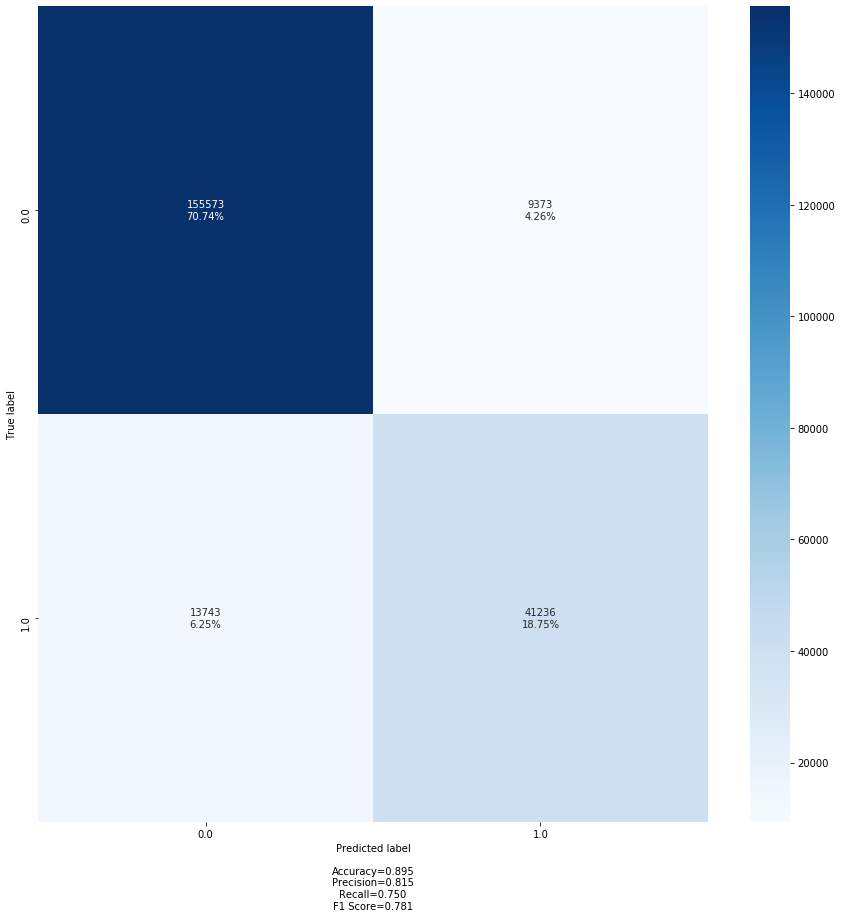

In [110]:
make_confusion_matrix(confusion_matrix(teste_y, previsoes,labels), figsize=(15,15), categories=labels)

In [104]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve
def calcRoc(teste_y, teste_x, modelo):
  p = modelo.predict_proba(teste_x)[:,1]
  auc = roc_auc_score(teste_y,p)
  print(auc)
  fpr, tpr, _ = roc_curve(teste_y,p)

  plt.clf()
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.show()



In [107]:
col = dados[['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_REDACAO']]

In [114]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(col.values)

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
import time
oldTime = time.time()

clusterer = KMeans(n_clusters=2,random_state=13,n_init=100)
cluster_labels = clusterer.fit_predict(X)



labels = pd.DataFrame(clusterer.labels_)



elapsed = time.time() - oldTime;

print("Time: ", elapsed)



Time:  58.600934743881226


In [176]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
import time
def clustering(data_clustering,num_clusters=2):
    oldTime = time.time()
    clusterer = KMeans(num_clusters,random_state=13)
    cluster_labels = clusterer.fit_predict(data_clustering)
    elapsed = time.time() - oldTime;
    print("Time: ", elapsed)
    return cluster_labels

def preprocess(data,preprocess_method=1):
    if preprocess_method == 0:
        scaler = StandardScaler()
        X = scaler.fit_transform(data.values)
    elif preprocess_method == 1:
        scaler = preprocessing.QuantileTransformer(n_quantiles=5, random_state=13)
        X = scaler.fit_transform(data.values)
    elif preprocess_method == 2:
        scaler = preprocessing.MinMaxScaler()
        X = scaler.fit_transform(data.values)
    return X

def silhouette(data_silhouette,cluster_labels):
    oldTime = time.time()
    silhouette_avg = silhouette_score(data_silhouette, cluster_labels)
    print(silhouette_avg)
    elapsed = time.time() - oldTime
    print("Time: ", elapsed)
    return silhouette_avg

def get_notas(dataframe_enem):
    col = dataframe_enem[['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_REDACAO']]
    return col

In [178]:
sample = dados.sample(500000)
notas = get_notas(sample)
notas_processadas = preprocess(notas)
clusters = clustering(notas_processadas)
silhouette(notas_processadas,clusters)

Time:  2.8633453845977783
0.4234045996368679
Time:  2816.7863454818726


0.4234045996368679

In [172]:
len(notas_processadas)


300000

In [173]:
len(clusters)

100000

In [174]:
clusters

array([1, 0, 1, ..., 0, 1, 1])